### <u>Iceberg Notes</u>

Capital: 750,000 seashells

- Sell-fridges: Demand plummeting
    - Used as meditation chamber, medidation chambers popular but only to expensive centers.
- Frostier: icicle earrings: 480 snowballs per pair (demand surplus)
    - Tiffany & Snow acquired Frostier
    - sell all stock to T&S going forward starting with 1200 stock for 558,000 snowballs
- Power out due to electric blanket demand surge during 7-day cold streak
    - blankets recalled for excessive power usage
- Dogsled tax
    - 12% -> 36% per sled (doesn't matter how many dogs) to encourage public transport usage
- Most ice sculptures being shipped destroyed by bad weather
    - Lost ones will be remade (takes 12 months)
- PS6 sales surge by 39% due to exclusive game release
    - User retention 1% drop
- Moustach product found to be 99% meltwater + seaweed extract
    - Waldo in hiding
- 400,000 lava lamps in storage destroyed
    - spills cleaned completely
- Chilliver lawsuit against hot chocolate company for being too hot
    - Not the case?

### <u>Setup</u>
The more you trade in a good, the higher the fees will be.

Enter percentages (integers only) to buy/sell and don't exceed provided capital

- Cost = Capital * Pct
- Fee = 90 * Pct^2

Trading against previous day's prices

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
capital = 750000
pct = np.arange(1,101,1)
cost = pct * capital * 0.01
fee = pct**2 * 90

Text(0.5, 1.0, 'Cost and fee as a function of pct capital allocation')

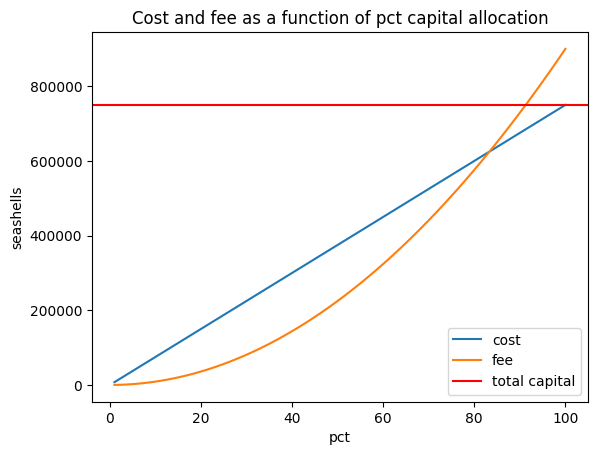

In [56]:
plt.plot(pct, cost, label='cost')
plt.plot(pct, fee, label='fee')
plt.axhline(y=750000, color='r', label='total capital')
plt.legend()
plt.xlabel('pct')
plt.ylabel('seashells')
plt.title('Cost and fee as a function of pct capital allocation')

In [57]:
diff = cost - fee
max_diff = np.max(diff)
max_diff_pct = pct[np.argmax(diff)]
print('maximal diff between cost and fee is', max_diff, 'at pct', max_diff_pct)

maximal diff between cost and fee is 156240.0 at pct 42


In [58]:
# estimate
idx = np.argwhere(np.diff(np.sign(cost - fee))).flatten()
print('intersection at pct', pct[idx], 'cost', cost[idx], 'fee', fee[idx])

intersection at pct [83] cost [622500.] fee [620010]


### <u>Approach</u>
- Predict direction of price change for each good (up, flat, down)
- Relative ordering of % price change for all goods
- Estimate % price change
- Analyze expected profit from each good against potential fee to determine optimal capital allocation

### <u>Notes (with estimated price changes)</u>
- Refrigerators
    - up a little
    - estimated price change: +10%
- Icicle earrings
    - up a lot
    - Acquired at 465 - demand control, luxury, mark up
    - +20%
- Electric blankets
    - down a lot
    - temporary demand, recall
    - -65% (trade more conservatively than this)
- Sleds
    - down a little
    - 21.4% more expensive to own a sled
    - -10%
- Ice Sculptures
    - up a lot
    - very limited supply
    - +220% (very risky to act on this)
- PS6
    - up a little
    - +15%
- Moustache serum
    - down a lot
    - -45%
- Lava lamps
    - down a little
    - lower demand but also limited supply
    - -5%
- Hot chocolate
    - flat
    - a lawsuit is bad for the product, but this could end up being a troll?
    - 0%

### <u>Submission</u>
Attempting to maximize profit assuming price changes are in the vicinity of the above estimates
- Refrigerators: Buy 4%
- Icicle earrings: Buy 8%
- Electric blankets: Sell 13%
- Sleds: Sell 4%
- Ice Sculptures: Buy 31%
- PS6: Buy 6%
- Moustache serum: Sell 27%
- Lava lamps: Sell 2%
- Hot chocolate: Buy 0%